In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import holoviews as hv
import plotly.graph_objects as go
from holoviews import opts
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, recall_score, matthews_corrcoef, accuracy_score, auc, roc_curve
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../dat/dips/DIPS_Data.csv", sep = ",", low_memory = False)
data_change = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change_idx.csv", sep = ",", low_memory = False)
data_change_excl = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change_excl.csv", sep = ",", low_memory = False)
with open("../dat/dips/indices_k1_not_space.txt", "r") as f:
    excl_indices = [int(line.strip()) for line in f.readlines()]

In [3]:
y_pred_lr = pd.read_csv("01_ML/y_pred_ML/y_pred_lr.csv", sep =",")
# y_pred_lr_excl = pd.read_csv("01_ML/y_pred_ML/y_pred_lr_excl.csv", sep =",")
y_pred_rf = pd.read_csv("01_ML/y_pred_ML/y_pred_rf.csv", sep =",")
y_pred_svc = pd.read_csv("01_ML/y_pred_ML/y_pred_svc.csv", sep =",")
y_pred_dnn = pd.read_csv("01_ML/y_pred_ML/y_pred_dnn.csv", sep =",")
y_pred_knn = pd.read_csv("01_ML/y_pred_ML/y_pred_knn.csv", sep =",")
# y_pred_knn_excl = pd.read_csv("01_ML/y_pred_ML/y_pred_knn_excl.csv", sep =",")
y_pred_nb = pd.read_csv("01_ML/y_pred_ML/y_pred_nb.csv", sep =",")
# y_pred_nb_excl = pd.read_csv("01_ML/y_pred_ML/y_pred_nb_excl.csv", sep =",")

In [4]:
y_pred_GPT_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_simple_prompt.csv", sep =",")
y_pred_GPT_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_class_definitions_prompt.csv", sep =",")
y_pred_GPT_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_few_shot_prompt.csv", sep =",")
y_pred_GPT_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_vignette_prompt.csv", sep =",")
y_pred_GPT_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_cot_prompt.csv", sep =",")

In [5]:
y_pred_GPT_o3_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_simple_prompt.csv", sep =",")
y_pred_GPT_o3_class_definitions_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_class_definitions_prompt.csv", sep =",")
y_pred_GPT_o3_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_o3_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_few_shot_prompt.csv", sep =",")
y_pred_GPT_o3_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_vignette_prompt.csv", sep =",")
y_pred_GPT_o3_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_cot_prompt.csv", sep =",")

In [6]:
y_pred_Gemini_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_simple_prompt.csv", sep =",")
y_pred_Gemini_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_class_definitions_prompt.csv", sep =",")
y_pred_Gemini_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_profiled_simple_prompt.csv", sep =",")
y_pred_Gemini_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt.csv", sep =",")
y_pred_Gemini_few_shot_prompt_10 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_10.csv", sep =",")
y_pred_Gemini_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_20.csv", sep =",")
y_pred_Gemini_few_shot_prompt_50 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_50.csv", sep =",")
y_pred_Gemini_few_shot_prompt_100 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_100.csv", sep =",")
y_pred_Gemini_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_vignette_prompt.csv", sep =",")
y_pred_Gemini_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_cot_prompt.csv", sep =",")

In [7]:
y_pred_Gemma_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_simple_prompt.csv", sep =",")
y_pred_Gemma_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_class_definitions_prompt.csv", sep =",")
y_pred_Gemma_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_profiled_simple_prompt.csv", sep =",")
y_pred_Gemma_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_few_shot_prompt.csv", sep =",")
y_pred_Gemma_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_vignette_prompt.csv", sep =",")
y_pred_Gemma_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_cot_prompt.csv", sep =",")

In [8]:
y_pred_Claude_4_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_simple_prompt.csv", sep =",")
y_pred_Claude_4_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_class_definitions_prompt.csv", sep =",")
y_pred_Claude_4_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/Claude/y_pred_claude_profiled_simple_prompt.csv", sep =",")
y_pred_Claude_4_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_few_shot_prompt.csv", sep =",")
y_pred_Claude_4_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_vignette_prompt.csv", sep =",")
y_pred_Claude_4_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_cot_prompt.csv", sep =",")

In [9]:
y_pred_DeepSeek_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_simple_prompt.csv", sep =",")
y_pred_DeepSeek_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_class_definitions_prompt.csv", sep =",")
y_pred_DeepSeek_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_profiled_simple_prompt.csv", sep =",")
y_pred_DeepSeek_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt_20.csv", sep =",")
y_pred_DeepSeek_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt.csv", sep =",")
y_pred_DeepSeek_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_vignette_prompt.csv", sep =",")
y_pred_DeepSeek_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_cot_prompt.csv", sep =",")

In [10]:
y_pred_Grok_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_simple_prompt.csv", sep =",")
y_pred_Grok_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_class_definitions_prompt.csv", sep =",")
y_pred_Grok_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_profiled_simple_prompt.csv", sep =",")
y_pred_Grok_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt.csv", sep =",")
y_pred_Grok_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt_20.csv", sep =",")
y_pred_Grok_few_shot_prompt_100 = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt_100.csv", sep =",")
y_pred_Grok_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_vignette_prompt.csv", sep =",")
y_pred_Grok_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_cot_prompt.csv", sep =",")

In [11]:
X_train_GPT_4_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_simple_prompt.csv", sep = ",")
X_train_GPT_4_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_class_definitions_prompt.csv", sep = ",")
X_train_GPT_4_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_profiled_simple_prompt.csv", sep = ",")
X_train_GPT_4_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_few_shot_prompt.csv", sep = ",")
X_train_GPT_4_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_vignette_prompt.csv", sep = ",")
X_train_GPT_4_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_cot_prompt.csv", sep = ",")

In [12]:
X_train_GPT_o3_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_simple_prompt.csv", sep = ",")
X_train_GPT_o3_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_class_definitions_prompt.csv", sep = ",")
X_train_GPT_o3_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_profiled_simple_prompt.csv", sep = ",")
X_train_GPT_o3_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_few_shot_prompt.csv", sep = ",")
X_train_GPT_o3_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_vignette_prompt.csv", sep = ",")
X_train_GPT_o3_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_cot_prompt.csv", sep = ",")

In [13]:
X_train_Gemini_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemini/X_train_Gemini_simple_prompt.csv", sep = ",")
# X_train_Gemini_class_def_prompt = pd.read_csv(
#     "04_Unification/New_Input_Prompting/X_train_pred/Gemini/X_train_Gemini_class_def_prompt.csv", sep = ",")
# X_train_Gemini_profiled_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemini/X_train_Gemini_profiled_simple_prompt.csv", sep = ",")
# X_train_Gemini_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemini/X_train_Gemini_few_shot_prompt.csv", sep = ",")
# X_train_Gemini_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemini/X_train_Gemini_vignette_prompt.csv", sep = ",")
# X_train_Gemini_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemini/X_train_Gemini_cot_prompt.csv", sep = ",")

In [14]:
X_train_Gemma_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_simple_prompt.csv", sep = ",")
X_train_Gemma_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_class_definitions_prompt.csv", sep = ",")
X_train_Gemma_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_profiled_simple_prompt.csv", sep = ",")
X_train_Gemma_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_few_shot_prompt.csv", sep = ",")
X_train_Gemma_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_vignette_prompt.csv", sep = ",")
X_train_Gemma_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Gemma/X_train_Gemma_cot_prompt.csv", sep = ",")

In [15]:
X_train_Claude_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_simple_prompt.csv", sep = ",")
X_train_Claude_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_class_definitions_prompt.csv", sep = ",")
X_train_Claude_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_profiled_simple_prompt.csv", sep = ",")
X_train_Claude_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_few_shot_prompt.csv", sep = ",")
X_train_Claude_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_vignette_prompt.csv", sep = ",")
X_train_Claude_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Claude/X_train_Claude_cot_prompt.csv", sep = ",")

In [16]:
X_train_DeepSeek_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_simple_prompt.csv", sep = ",")
X_train_DeepSeek_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_class_definitions_prompt.csv", sep = ",")
X_train_DeepSeek_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_profiled_simple_prompt.csv", sep = ",")
X_train_DeepSeek_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_few_shot_prompt.csv", sep = ",")
X_train_DeepSeek_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_vignette_prompt.csv", sep = ",")
X_train_DeepSeek_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/DeepSeek/X_train_deeps_cot_prompt.csv", sep = ",")

In [17]:
X_train_Grok_simple_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_simple_prompt.csv", sep = ",")
X_train_Grok_class_def_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_class_definitions_prompt.csv", sep = ",")
X_train_Grok_profiled_simple_prompt = pd.read_csv(
    "04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_profiled_simple_prompt.csv", sep = ",")
X_train_Grok_few_shot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_few_shot_prompt.csv", sep = ",")
X_train_Grok_vignette_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_vignette_prompt.csv", sep = ",")
X_train_Grok_cot_prompt = pd.read_csv("04_Unification/New_Input_Prompting/X_train_pred/Grok/X_train_grok_cot_prompt.csv", sep = ",")

In [18]:
# merge data_change and data_change_excl on "Unnamed: 0" column, but keep index
data_change_excl = data_change_excl.set_index("Unnamed: 0")
data_change = data_change.set_index("Unnamed: 0")
data_change_merged = data_change.merge(data_change_excl["hpi"], on = "Unnamed: 0", how = "left", suffixes = ("", "_excl"))
data_change_merged["idx"] = range(len(data_change_merged))
data_change_merged.set_index("idx", inplace = True)
data_change_merged

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,whi_change,soz_change,gke_change,lzh_change,asi_change,bsq_change,das_change,scl_change,hpi,hpi_excl
idx,,,,,,,,,,,,,,,,,,,,,
0,1.905045,-1.858903,-0.994979,-1.928212,2.441714,0.062486,-0.359417,1.612646,0.764021,0.566822,...,-2.301869,2.753129,2.029671,1.900449,-2.518013,-1.431081,-2.600931,-2.639135,0.0,0.0
1,0.455324,-0.434443,-0.088340,0.660932,0.041981,0.413949,-1.169769,0.423639,-0.382329,0.941935,...,-0.752017,0.204409,0.647389,-0.211204,-0.585676,-0.262880,0.105940,-0.073737,0.0,0.0
2,3.838008,-0.701529,-0.315000,-1.280926,0.041981,-0.113246,1.261288,0.291528,-0.286800,0.441785,...,-0.752017,0.315223,0.094477,0.316709,1.070613,-0.262880,-0.164747,1.783966,0.0,NaN
3,-0.511158,0.990016,0.138320,0.175467,-0.957908,-1.079771,-0.521487,-0.369032,0.477433,0.024994,...,-0.235399,-0.017219,0.647389,0.492680,-0.723700,-1.041680,-0.489571,0.147418,0.0,NaN
4,-0.027917,-1.947932,0.591639,-1.280926,-0.357975,-0.640441,-0.440452,-1.690150,-1.337621,1.525442,...,-0.235399,3.639640,0.923846,2.476355,0.518517,0.321221,-3.034031,-0.162199,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,-0.511158,0.277787,-1.221639,-0.148176,-1.157886,-1.343368,-0.359417,0.555751,-0.018124,0.275069,...,0.281218,-0.460475,0.370933,0.844622,-0.723700,0.826225,-1.355770,0.893382,0.0,0.0
1225,-0.511158,-0.790558,-0.541660,0.822753,-0.757930,-0.376844,-0.278381,1.084199,0.477433,1.066972,...,0.281218,0.758478,-1.011349,-1.794945,0.242469,-0.068179,-1.518183,-0.692971,0.0,NaN
1226,-0.511158,-0.523472,-0.315000,0.013646,0.241958,0.238217,0.288865,-1.293815,-1.242092,-0.308439,...,0.281218,-0.349661,0.370933,1.372536,1.346661,0.710621,-0.814396,0.191649,0.0,0.0


In [19]:
# Predictors
X = data_change_merged
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change_merged[["hpi"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("X_train shape: ", X_train.shape, round(X_train.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

X_train shape:  (983, 23) 0.8 
 X_test shape:  (246, 23) 0.2 
 y_train shape:  (983, 1) 0.8 
 y_test shape:  (246, 1) 0.2 



In [20]:
# get all indices that contain NA in X_train
NA_indices_train = X_train[X_train.isna().any(axis=1)].index.tolist()
NA_indices_test = X_test[X_test.isna().any(axis=1)].index.tolist()
NA_indices = NA_indices_train + NA_indices_test

In [21]:
# y_train = y_train[~y_train.index.isin(NA_indices_train)]
# y_test = y_test[~y_test.index.isin(NA_indices_test)]

In [22]:
train_indices = y_train.index.tolist()
test_indices = y_test.index.tolist()

In [23]:
original_indices = train_indices + test_indices
original_indices

[929,
 805,
 854,
 1045,
 36,
 589,
 641,
 493,
 275,
 876,
 1166,
 476,
 371,
 624,
 94,
 442,
 210,
 154,
 201,
 559,
 401,
 239,
 812,
 491,
 213,
 780,
 795,
 481,
 1119,
 360,
 741,
 1141,
 603,
 460,
 595,
 657,
 979,
 757,
 933,
 902,
 378,
 31,
 1202,
 1197,
 125,
 536,
 673,
 243,
 1217,
 822,
 1212,
 39,
 498,
 548,
 1125,
 927,
 985,
 58,
 717,
 318,
 313,
 733,
 463,
 274,
 937,
 50,
 183,
 174,
 1018,
 270,
 384,
 622,
 72,
 106,
 749,
 594,
 84,
 413,
 212,
 609,
 877,
 935,
 723,
 991,
 142,
 108,
 878,
 1180,
 523,
 611,
 887,
 349,
 586,
 610,
 256,
 301,
 2,
 71,
 204,
 448,
 537,
 1043,
 587,
 1039,
 643,
 930,
 550,
 963,
 614,
 913,
 348,
 986,
 1191,
 1023,
 189,
 769,
 119,
 836,
 461,
 279,
 804,
 48,
 1185,
 649,
 298,
 845,
 99,
 551,
 330,
 397,
 1223,
 994,
 911,
 604,
 926,
 483,
 964,
 477,
 608,
 231,
 846,
 579,
 16,
 743,
 860,
 740,
 151,
 517,
 1087,
 105,
 646,
 527,
 1178,
 269,
 840,
 1160,
 216,
 1174,
 835,
 237,
 508,
 796,
 226,
 1159,
 888,
 5

In [24]:
len(original_indices)

1229

In [25]:
# data_change = data_change.set_index("Unnamed: 0")
# data_change_excl = data_change_excl.set_index("Unnamed: 0")
#
# # only keep idx of data_change that are in data_change_excl
# excl_indices = data_change_excl.index.tolist()
# data_change = data_change[data_change.index.isin(excl_indices)]
# data_change["hpi"]

In [26]:
change_indices = data_change.index.tolist()
excl_indices = data_change_excl.index.tolist()

# are excl_indices and change_indices the same?
excl_indices_set = set(excl_indices)
change_indices_set = set(change_indices)
if excl_indices_set == change_indices_set:
    print("excl_indices and change_indices are the same")
else:
    print("excl_indices and change_indices are not the same")
    # find difference
    diff = excl_indices_set.difference(change_indices_set)
    print("Difference: ", diff)

excl_indices and change_indices are not the same
Difference:  set()


In [27]:
# Predictors
X = data_change
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change[["hpi"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("X_train shape: ", X_train.shape, round(X_train.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

X_train shape:  (983, 22) 0.8 
 X_test shape:  (246, 22) 0.2 
 y_train shape:  (983, 1) 0.8 
 y_test shape:  (246, 1) 0.2 



In [28]:
train_indices = y_train.index.tolist()
test_indices = y_test.index.tolist()

In [29]:
original_indices = train_indices + test_indices
original_indices

[1145,
 993,
 1055,
 1289,
 46,
 727,
 786,
 607,
 332,
 1081,
 1456,
 584,
 457,
 768,
 117,
 543,
 250,
 183,
 239,
 687,
 495,
 285,
 1004,
 604,
 253,
 959,
 982,
 590,
 1394,
 443,
 907,
 1422,
 744,
 563,
 736,
 803,
 1206,
 929,
 1149,
 1112,
 466,
 38,
 1504,
 1498,
 150,
 660,
 821,
 290,
 1523,
 1016,
 1517,
 49,
 612,
 674,
 1400,
 1143,
 1212,
 70,
 877,
 385,
 380,
 895,
 567,
 330,
 1154,
 60,
 219,
 209,
 1251,
 325,
 474,
 766,
 89,
 131,
 917,
 735,
 106,
 510,
 252,
 752,
 1082,
 1152,
 883,
 1219,
 168,
 133,
 1084,
 1475,
 642,
 754,
 1095,
 427,
 723,
 753,
 305,
 364,
 4,
 88,
 243,
 549,
 661,
 1286,
 725,
 1281,
 788,
 1146,
 677,
 1187,
 757,
 1124,
 425,
 1213,
 1490,
 1258,
 226,
 944,
 144,
 1031,
 564,
 337,
 992,
 58,
 1480,
 794,
 361,
 1044,
 123,
 678,
 402,
 490,
 1529,
 1222,
 1122,
 745,
 1142,
 594,
 1188,
 585,
 750,
 275,
 1045,
 712,
 19,
 911,
 1065,
 906,
 179,
 635,
 1347,
 130,
 791,
 648,
 1473,
 322,
 1037,
 1450,
 257,
 1468,
 1029,
 283,


In [30]:
max_idx = max(original_indices)
max_idx

1537

In [31]:
len(original_indices)

1229

In [32]:
data_change["idx"] = range(len(data_change))
data_change.set_index("idx", inplace = True)
data_change

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,ses_kom,whi_change,soz_change,gke_change,lzh_change,asi_change,bsq_change,das_change,scl_change,hpi
idx,,,,,,,,,,,,,,,,,,,,,
0,1.905045,-1.858903,-0.994979,-1.928212,2.441714,0.062486,-0.359417,1.612646,0.764021,0.566822,...,0,-2.301869,2.753129,2.029671,1.900449,-2.518013,-1.431081,-2.600931,-2.639135,0.0
1,0.455324,-0.434443,-0.088340,0.660932,0.041981,0.413949,-1.169769,0.423639,-0.382329,0.941935,...,1,-0.752017,0.204409,0.647389,-0.211204,-0.585676,-0.262880,0.105940,-0.073737,0.0
2,3.838008,-0.701529,-0.315000,-1.280926,0.041981,-0.113246,1.261288,0.291528,-0.286800,0.441785,...,0,-0.752017,0.315223,0.094477,0.316709,1.070613,-0.262880,-0.164747,1.783966,0.0
3,-0.511158,0.990016,0.138320,0.175467,-0.957908,-1.079771,-0.521487,-0.369032,0.477433,0.024994,...,1,-0.235399,-0.017219,0.647389,0.492680,-0.723700,-1.041680,-0.489571,0.147418,0.0
4,-0.027917,-1.947932,0.591639,-1.280926,-0.357975,-0.640441,-0.440452,-1.690150,-1.337621,1.525442,...,0,-0.235399,3.639640,0.923846,2.476355,0.518517,0.321221,-3.034031,-0.162199,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,-0.511158,0.277787,-1.221639,-0.148176,-1.157886,-1.343368,-0.359417,0.555751,-0.018124,0.275069,...,0,0.281218,-0.460475,0.370933,0.844622,-0.723700,0.826225,-1.355770,0.893382,0.0
1225,-0.511158,-0.790558,-0.541660,0.822753,-0.757930,-0.376844,-0.278381,1.084199,0.477433,1.066972,...,0,0.281218,0.758478,-1.011349,-1.794945,0.242469,-0.068179,-1.518183,-0.692971,0.0
1226,-0.511158,-0.523472,-0.315000,0.013646,0.241958,0.238217,0.288865,-1.293815,-1.242092,-0.308439,...,0,0.281218,-0.349661,0.370933,1.372536,1.346661,0.710621,-0.814396,0.191649,0.0


In [33]:
# data_eval = data_change[~data_change.index.isin(excl_indices)]
data_eval = data_change[~data_change.index.isin(NA_indices)]
# data_eval = data_change
# Predictors
X = data_eval
X = data_eval.drop(["hpi"], axis = 1)

# Target
y = data_eval["hpi"]

# Train-test split
_, _, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [34]:
len(data_eval)

982

In [35]:
len(data_change) - len(NA_indices)

982

In [36]:
data_excl = data_change[~data_change.index.isin(NA_indices)]
data_excl["hpi"].isna().sum()

np.int64(0)

In [39]:
def whole_df(X_train_LLM, y_pred_LLM):
    df = pd.concat([X_train_LLM, y_pred_LLM], axis = 0)

    df["original_index"] = original_indices
    df = df.sort_values(by = "original_index").reset_index(drop = True)

    # df = df[~df["original_index"].isin(excl_indices)]
    df = df[~df["original_index"].isin(NA_indices)]
    df = df.drop(["original_index"], axis = 1)

    # data_excl = data_change[~data_change.index.isin(excl_indices)]
    data_excl = data_change[~data_change.index.isin(NA_indices)]
    # data_excl = data_change
    df["hpi"] = data_eval["hpi"]

    # Train-test split
    X = df
    X = X.drop(["hpi"], axis = 1)
    y = df["hpi"]
    print(y.isna().sum())
    y_pred_train_df, y_pred_test_df, _, _ = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

    y_pred_test = y_pred_test_df["y_pred"]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_test)
    macro_f1 = recall_score(y_test, y_pred_test, average="macro")
    micro_f1 = recall_score(y_test, y_pred_test, average="micro")
    mcc = matthews_corrcoef(y_test, y_pred_test)

    cm = confusion_matrix(y_test, y_pred_test)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test, pos_label=1)
    roc_auc = auc(fpr, tpr)

    # dictionary with all metrics
    metrics = {
        "accuracy": accuracy,
        "macro_f1": macro_f1,
        "micro_f1": micro_f1,
        "mcc": mcc,
        "precision": precision,
        "recall": recall,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "roc_auc": roc_auc
    }

    return df, metrics

In [40]:
data_GPT_o3_simple_prompt, metrics_GPT_o3_simple_prompt = whole_df(X_train_GPT_o3_simple_prompt, y_pred_GPT_o3_simple_prompt)
data_GPT_o3_class_definitions_prompt, metrics_GPT_o3_class_definitions_prompt = whole_df(X_train_GPT_o3_class_def_prompt, y_pred_GPT_o3_class_definitions_prompt)
data_GPT_o3_profiled_simple_prompt, metrics_GPT_o3_profiled_simple_prompt = whole_df(X_train_GPT_o3_profiled_simple_prompt, y_pred_GPT_o3_profiled_simple_prompt)
data_GPT_o3_few_shot_prompt, metrics_GPT_o3_few_shot_prompt = whole_df(X_train_GPT_o3_few_shot_prompt, y_pred_GPT_o3_few_shot_prompt)
data_GPT_o3_vignette_prompt, metrics_GPT_o3_vignette_prompt = whole_df(X_train_GPT_o3_vignette_prompt, y_pred_GPT_o3_vignette_prompt)
data_GPT_o3_cot_prompt, metrics_GPT_o3_cot_prompt = whole_df(X_train_GPT_o3_cot_prompt, y_pred_GPT_o3_cot_prompt)

206


TypeError: cannot unpack non-iterable NoneType object

In [30]:
# data_Gemini_simple_prompt, metrics_Gemini_simple_prompt = whole_df(X_train_Gemini_simple_prompt, y_pred_Gemini_simple_prompt)
# data_Gemini_class_def_prompt, metrics_Gemini_class_def_prompt = whole_df(X_train_Gemini_class_def_prompt, y_pred_Gemini_class_def_prompt)
# data_Gemini_profiled_simple_prompt, metrics_Gemini_profiled_simple_prompt = whole_df(X_train_Gemini_profiled_simple_prompt, y_pred_Gemini_profiled_simple_prompt)
# data_Gemini_few_shot_prompt, metrics_Gemini_few_shot_prompt = whole_df(X_train_Gemini_few_shot_prompt, y_pred_Gemini_few_shot_prompt)
# data_Gemini_vignette_prompt, metrics_Gemini_vignette_prompt = whole_df(X_train_Gemini_vignette_prompt, y_pred_Gemini_vignette_prompt)
# data_Gemini_cot_prompt, metrics_Gemini_cot_prompt = whole_df(X_train_Gemini_cot_prompt, y_pred_Gemini_cot_prompt)

In [31]:
data_Gemma_simple_prompt, metrics_Gemma_simple_prompt = whole_df(X_train_Gemma_simple_prompt, y_pred_Gemma_simple_prompt)
data_Gemma_class_def_prompt, metrics_Gemma_class_def_prompt = whole_df(X_train_Gemma_class_def_prompt, y_pred_Gemma_class_def_prompt)
data_Gemma_profiled_simple_prompt, metrics_Gemma_profiled_simple_prompt = whole_df(X_train_Gemma_profiled_simple_prompt, y_pred_Gemma_profiled_simple_prompt)
data_Gemma_few_shot_prompt, metrics_Gemma_few_shot_prompt = whole_df(X_train_Gemma_few_shot_prompt, y_pred_Gemma_few_shot_prompt)
data_Gemma_vignette_prompt, metrics_Gemma_vignette_prompt = whole_df(X_train_Gemma_vignette_prompt, y_pred_Gemma_vignette_prompt)
data_Gemma_cot_prompt, metrics_Gemma_cot_prompt = whole_df(X_train_Gemma_cot_prompt, y_pred_Gemma_cot_prompt)

In [32]:
data_Claude_4_simple_prompt, metrics_Claude_4_simple_prompt = whole_df(X_train_Claude_simple_prompt, y_pred_Claude_4_simple_prompt)
data_Claude_4_class_def_prompt, metrics_Claude_4_class_def_prompt = whole_df(X_train_Claude_class_def_prompt, y_pred_Claude_4_class_def_prompt)
data_Claude_4_profiled_simple_prompt, metrics_Claude_4_profiled_simple_prompt = whole_df(X_train_Claude_profiled_simple_prompt, y_pred_Claude_4_profiled_simple_prompt)
data_Claude_4_few_shot_prompt, metrics_Claude_4_few_shot_prompt = whole_df(X_train_Claude_few_shot_prompt, y_pred_Claude_4_few_shot_prompt)
data_Claude_4_vignette_prompt, metrics_Claude_4_vignette_prompt = whole_df(X_train_Claude_vignette_prompt, y_pred_Claude_4_vignette_prompt)
data_Claude_4_cot_prompt, metrics_Claude_4_cot_prompt = whole_df(X_train_Claude_cot_prompt, y_pred_Claude_4_cot_prompt)

In [33]:
data_DeepSeek_simple_prompt, metrics_DeepSeek_simple_prompt = whole_df(X_train_DeepSeek_simple_prompt, y_pred_DeepSeek_simple_prompt)
data_DeepSeek_class_def_prompt, metrics_DeepSeek_class_def_prompt = whole_df(X_train_DeepSeek_class_def_prompt, y_pred_DeepSeek_class_def_prompt)
data_DeepSeek_profiled_simple_prompt, metrics_DeepSeek_profiled_simple_prompt = whole_df(X_train_DeepSeek_profiled_simple_prompt, y_pred_DeepSeek_profiled_simple_prompt)
data_DeepSeek_few_shot_prompt, metrics_DeepSeek_few_shot_prompt = whole_df(X_train_DeepSeek_few_shot_prompt, y_pred_DeepSeek_few_shot_prompt)
data_DeepSeek_vignette_prompt, metrics_DeepSeek_vignette_prompt = whole_df(X_train_DeepSeek_vignette_prompt, y_pred_DeepSeek_vignette_prompt)
data_DeepSeek_cot_prompt, metrics_DeepSeek_cot_prompt = whole_df(X_train_DeepSeek_cot_prompt, y_pred_DeepSeek_cot_prompt)

In [34]:
data_Grok_simple_prompt, metrics_Grok_simple_prompt = whole_df(X_train_Grok_simple_prompt, y_pred_Grok_simple_prompt)
data_Grok_class_def_prompt, metrics_Grok_class_def_prompt = whole_df(X_train_Grok_class_def_prompt, y_pred_Grok_class_def_prompt)
data_Grok_profiled_simple_prompt, metrics_Grok_profiled_simple_prompt = whole_df(X_train_Grok_profiled_simple_prompt, y_pred_Grok_profiled_simple_prompt)
data_Grok_few_shot_prompt, metrics_Grok_few_shot_prompt = whole_df(X_train_Grok_few_shot_prompt, y_pred_Grok_few_shot_prompt)
data_Grok_vignette_prompt, metrics_Grok_vignette_prompt = whole_df(X_train_Grok_vignette_prompt, y_pred_Grok_vignette_prompt)
data_Grok_cot_prompt, metrics_Grok_cot_prompt = whole_df(X_train_Grok_cot_prompt, y_pred_Grok_cot_prompt)

## Visualizations

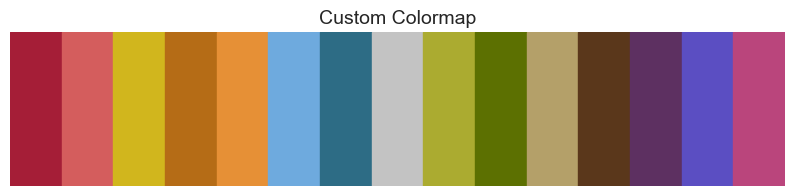

In [35]:
# define colors for the models

# base colors of QDS
base_colors = {
    "red": (165/255, 30/255, 55/255),
    "gray": (195/255, 195/255, 195/255),
    "lightgray": (203/255, 203/255, 203/255),
    "gold": (180/255, 160/255, 105/255),
}

hex_colors = [
    "#A51E37", "#D45D5D", "#D1B61D", "#B56C16", "#E69036",
    "#6EAADE", "#2D6C85", "#C3C3C3", "#ABAB30", "#5C7001",
    "#B4A069", "#5A371B", "#5D3061", "#5B4EC2", "#BA457C"
]

# Create a ListedColormap
custom_cmap = ListedColormap(hex_colors, name = "custom15")


# Visualize the colors
fig, ax = plt.subplots(figsize=(10, 2))
for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, len(hex_colors))
ax.set_ylim(0, 1)
ax.axis("off")
plt.title("Custom Colormap", fontsize=14)
plt.show()

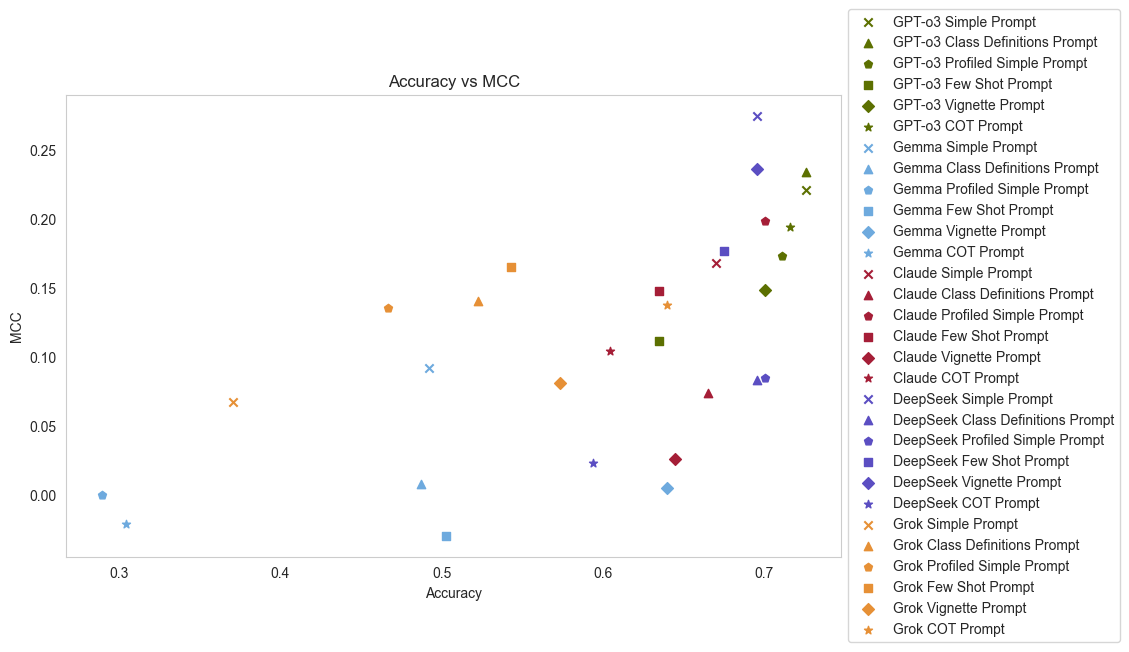

In [36]:
# plot all simple prompts for LLMs: MCC vs Accuracy
plt.figure(figsize = (10, 6))

# plt.scatter(metrics_lr_excl["accuracy"], metrics_lr_excl["mcc"], label = "Logistic Regression", color = hex_colors[7], marker = "o")
# plt.scatter(metrics_knn_excl["accuracy"], metrics_knn_excl["mcc"], label = "KNN", color = hex_colors[0], marker = "o")
# plt.scatter(metrics_nb_excl["accuracy"], metrics_nb_excl["mcc"], label = "Naive Bayes", color = hex_colors[9], marker = "o")

plt.scatter(metrics_GPT_o3_simple_prompt["accuracy"], metrics_GPT_o3_simple_prompt["mcc"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["accuracy"], metrics_GPT_o3_class_definitions_prompt["mcc"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["accuracy"], metrics_GPT_o3_profiled_simple_prompt["mcc"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["accuracy"], metrics_GPT_o3_few_shot_prompt["mcc"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["accuracy"], metrics_GPT_o3_vignette_prompt["mcc"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["accuracy"], metrics_GPT_o3_cot_prompt["mcc"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemma_simple_prompt["accuracy"], metrics_Gemma_simple_prompt["mcc"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["accuracy"], metrics_Gemma_class_def_prompt["mcc"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["accuracy"], metrics_Gemma_profiled_simple_prompt["mcc"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["accuracy"], metrics_Gemma_few_shot_prompt["mcc"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["accuracy"], metrics_Gemma_vignette_prompt["mcc"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["accuracy"], metrics_Gemma_cot_prompt["mcc"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")

plt.scatter(metrics_Claude_4_simple_prompt["accuracy"], metrics_Claude_4_simple_prompt["mcc"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["accuracy"], metrics_Claude_4_class_def_prompt["mcc"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["accuracy"], metrics_Claude_4_profiled_simple_prompt["mcc"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["accuracy"], metrics_Claude_4_few_shot_prompt["mcc"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["accuracy"], metrics_Claude_4_vignette_prompt["mcc"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["accuracy"], metrics_Claude_4_cot_prompt["mcc"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["accuracy"], metrics_DeepSeek_simple_prompt["mcc"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["accuracy"], metrics_DeepSeek_class_def_prompt["mcc"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["accuracy"], metrics_DeepSeek_profiled_simple_prompt["mcc"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
plt.scatter(metrics_DeepSeek_few_shot_prompt["accuracy"], metrics_DeepSeek_few_shot_prompt["mcc"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["accuracy"], metrics_DeepSeek_vignette_prompt["mcc"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["accuracy"], metrics_DeepSeek_cot_prompt["mcc"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["accuracy"], metrics_Grok_simple_prompt["mcc"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["accuracy"], metrics_Grok_class_def_prompt["mcc"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["accuracy"], metrics_Grok_profiled_simple_prompt["mcc"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["accuracy"], metrics_Grok_few_shot_prompt["mcc"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["accuracy"], metrics_Grok_vignette_prompt["mcc"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["accuracy"], metrics_Grok_cot_prompt["mcc"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")


# plt.xlim(0.3, 0.7)
# plt.ylim(-0.05, 0.25)

# plt.xlim(0, 1.02)
# plt.ylim(-1.02, 1.02)

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_all_models.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs_ML_0_1.png", dpi = 300, bbox_inches = "tight")

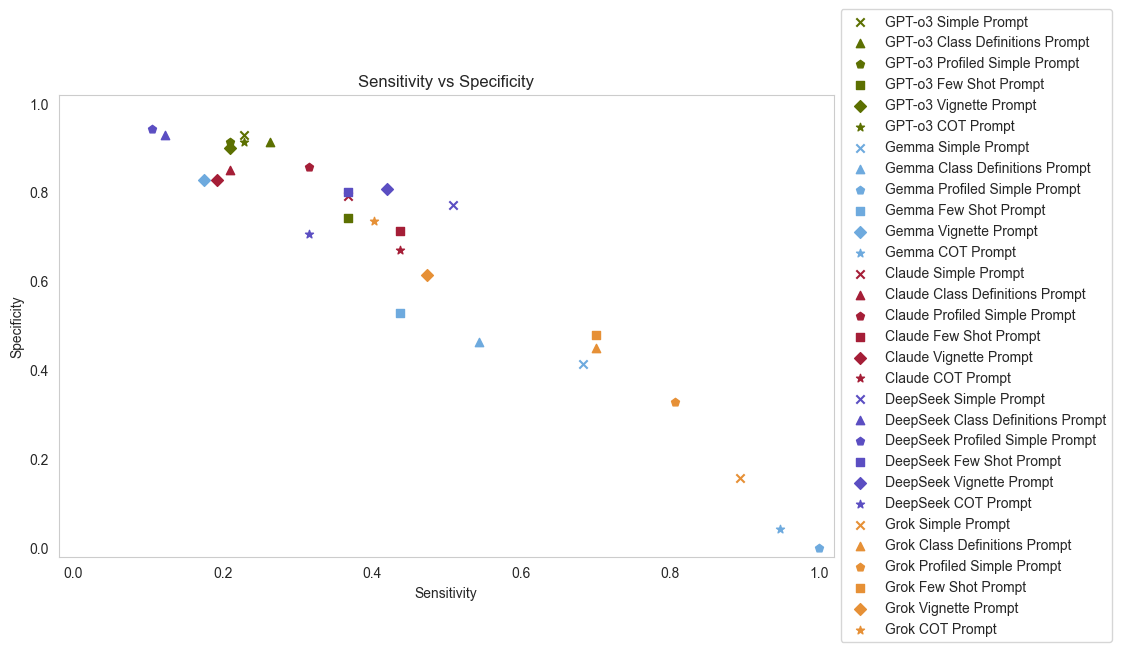

In [37]:
# plot sensitivity vs specificity for all simple prompts
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_o3_simple_prompt["sensitivity"], metrics_GPT_o3_simple_prompt["specificity"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["sensitivity"], metrics_GPT_o3_class_definitions_prompt["specificity"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["sensitivity"], metrics_GPT_o3_profiled_simple_prompt["specificity"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["sensitivity"], metrics_GPT_o3_few_shot_prompt["specificity"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["sensitivity"], metrics_GPT_o3_vignette_prompt["specificity"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["sensitivity"], metrics_GPT_o3_cot_prompt["specificity"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemma_simple_prompt["sensitivity"], metrics_Gemma_simple_prompt["specificity"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["sensitivity"], metrics_Gemma_class_def_prompt["specificity"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["sensitivity"], metrics_Gemma_profiled_simple_prompt["specificity"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["sensitivity"], metrics_Gemma_few_shot_prompt["specificity"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["sensitivity"], metrics_Gemma_vignette_prompt["specificity"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["sensitivity"], metrics_Gemma_cot_prompt["specificity"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")

plt.scatter(metrics_Claude_4_simple_prompt["sensitivity"], metrics_Claude_4_simple_prompt["specificity"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["sensitivity"], metrics_Claude_4_class_def_prompt["specificity"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["sensitivity"], metrics_Claude_4_profiled_simple_prompt["specificity"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["sensitivity"], metrics_Claude_4_few_shot_prompt["specificity"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["sensitivity"], metrics_Claude_4_vignette_prompt["specificity"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["sensitivity"], metrics_Claude_4_cot_prompt["specificity"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["sensitivity"], metrics_DeepSeek_simple_prompt["specificity"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["sensitivity"], metrics_DeepSeek_class_def_prompt["specificity"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["sensitivity"], metrics_DeepSeek_profiled_simple_prompt["specificity"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
plt.scatter(metrics_DeepSeek_few_shot_prompt["sensitivity"], metrics_DeepSeek_few_shot_prompt["specificity"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["sensitivity"], metrics_DeepSeek_vignette_prompt["specificity"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["sensitivity"], metrics_DeepSeek_cot_prompt["specificity"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["sensitivity"], metrics_Grok_simple_prompt["specificity"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["sensitivity"], metrics_Grok_class_def_prompt["specificity"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["sensitivity"], metrics_Grok_profiled_simple_prompt["specificity"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["sensitivity"], metrics_Grok_few_shot_prompt["specificity"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["sensitivity"], metrics_Grok_vignette_prompt["specificity"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["sensitivity"], metrics_Grok_cot_prompt["specificity"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/sensitivity_specificity_LLMs.png", dpi = 300, bbox_inches = "tight")